## Using performance at the NFL Scouting Combine to predict whether a player gets drafted


![NFL Scouting Combine 2016](images/combine.jpg)

### Introduction

Making an NFL team is a primary goal for many college football players, and a promising step toward that goal is getting selected by a team in the league's annual Draft, which occurs in Indianapolis every April. That is, being one of the 253 players selected over 7 rounds. However, prior to draft day much scouting and evaluation of talent takes place, enabling a team to narrow down its list of potential picks. 

The main showcase for player evaluation takes place at the NFL Scouting Combine in February, an invitation-only event. The Combine is used by the various NFL teams as a means to scout talent. The participants in the Combine are chosen by a selection committee that reviews and votes on all eligible players based on their performance in college\* games. Each athlete receiving the necessary number of votes, by position, is invited. The committee's intent is to invite every player that will be drafted in the ensuing NFL Draft. Approximately 300 athletes receive invitations out of countless hopefuls.

\* An athlete who is not playing collegiate football may qualify under a special circumstance in the year that correlates to his natural draft year had he been playing college football. 


### The Combine

At the Combine, each athlete is put through several physical, psychological and medical tests to aid teams in their draft selection process. The event takes place over several days and provides teams with an opportunity to quantify what they've largely only observed on film or in college games. Additonally, it's an opportunity for the athletes to showcase and draw attention to what's special about them. How an athlete peforms at the Scouting Combine may go a long way in determining whether and in which round he gets selected on draft day.

Many question the utility of the Combine and suggest that so much scouting goes on year round that the event is superfluous and contributes little to decisions made on draft day. Nevertheless, one good thing about the Combine is that scouts are able to compare athletes at the same position doing the same drills in the same place on the same surface at the same time, which can be valuable. Teams are able to weigh what they've seen on tape versus what they see at the Combine. 

My objective was to explore the relationship between Combine performance and whether a player is ultimtely selected on draft day. Specifically, whether Combine performance can predict draft-day outcome. Moreover, many underclassmen apply for early entry into the NFL Draft. In these cases the player forfeits the remainder of his college eligibility and often goes undrafted. Just this past year, 30 early entrants went undrafted (28% of early entrants). The Combine data may offer some insight for such situations.


### Project Overview

The focus of this project is on the contribution or relationship of the physical performace tests to draft selection. This isn't about finding talent in the draft nor predicting in which round an athlete will get picked. Rather, this is simply about looking at the data that is a product of the Combine and determining its usefulness in predicting whether a given player will get selected at the ensuing draft. Put another way, are the performance data predictive with any accuracy as to who will ***not*** get drafted. Surprisingly, given that the players are specifically invited to participate in the Combine based on a projection that they will be drafted, nearly 35% of these participants go undrafted. It would be useful to develop a model that could identify these players ahead of time.

### The Data

The dataset that I'm using has results from the NFL Scouting Combines from 1999 through 2015. This dataset has a total of 4947 entries. I did some preliminary cleaning and organizing of the data for my needs, but for all intents and purposes the data was kept intact.

Let's look at some of the data:



Number of features with a non-null/non-zero value
twentyyd: 140
arms: 1163
hands: 1164
fortyyd: 4756
twentyss: 3721
threecone: 1034
vertical: 4325
broad: 4185
bench: 3625
college: 3477

191 eliminated forty-yard dash, 1226 twentyss, 622 vertical, 762 broad, 1322 bench, 1470 college


"college" non-null values/null values: 3478/1469


In [313]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


master_dataframe = pd.read_csv("data/combines.csv")
list(master_dataframe.columns)


['year',
 'name',
 'firstname',
 'lastname',
 'position',
 'heightfeet',
 'heightinches',
 'heightinchestotal',
 'weight',
 'arms',
 'hands',
 'fortyyd',
 'twentyyd',
 'tenyd',
 'twentyss',
 'threecone',
 'vertical',
 'broad',
 'bench',
 'round',
 'college',
 'pick',
 'pickround',
 'picktotal',
 'wonderlic',
 'nflgrade']

Above is a list of the columns or features of the dataset. There are 26 features. In addition to getting various body measurements, each athlete participates in up to 8 performance drills (e.g. 40-yard dash, broad jump, bench press). I will only discuss the features that appear to contribute most to prediction. 

Below is a sample slice of 10 participants with a few columns displayed.

In [2]:
master_dataframe.iloc[520:530, [0,1,4,7,8,11,16, 17,18,19,20]]

,year,name,position,heightinchestotal,weight,fortyyd,vertical,broad,bench,round,college
520,2014,Tre Mason,RB,68.0,207,4.50,38.5,126,0,3,Auburn
521,2014,Jeff Mathews,QB,76.0,223,5.26,25.5,105,0,0,Cornell
522,2014,Jake Matthews,OT,77.0,308,5.07,30.5,105,24,1,Texas A&M
523,2014,Jordan Matthews,WR,75.0,212,4.46,35.5,120,21,2,Vanderbilt
524,2014,Josh Mauro,DE,78.0,271,5.21,32.0,116,21,0,Stanford
525,2014,AJ McCarron,QB,75.0,220,4.94,28.0,99,0,6,Alabama
526,2014,Daniel McCullers,DT,79.0,352,0.00,20.5,97,27,7,Tennessee
527,2014,Dexter McDougle,CB,70.0,196,0.00,0.0,0,0,3,Maryland
528,2014,Keith McGill,CB,75.0,211,4.51,39.0,129,0,4,Utah
529,2014,Jerick McKinnon,RB,69.0,209,4.41,40.5,132,32,3,Georgia Southern


Let's look at a summary of select features within the data. The data has 4947 rows and note that the the fastest (min) 40-yard dash is 0.0 with the max being 6.05 seconds. The 0.0 is because if an athlete didn't participate in a particular drill a "0" was recorded.

In [3]:
master_dataframe[["heightinchestotal", "weight", "fortyyd", "threecone", "vertical", "broad", "bench" ]].describe()

,heightinchestotal,weight,fortyyd,threecone,vertical,broad,bench
count,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000
mean,74.035476,245.579745,4.610386,1.503002,28.741257,95.944006,15.723873
std,2.614778,45.639366,0.974087,2.929683,11.596749,41.826340,10.840896
min,65.000000,155.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,208.000000,4.530000,0.000000,28.000000,101.000000,0.000000
50%,74.000000,237.000000,4.690000,0.000000,32.500000,112.000000,18.000000
75%,76.000000,289.000000,4.990000,0.000000,35.500000,119.000000,24.000000
max,82.000000,386.000000,6.050000,8.310000,46.000000,147.000000,51.000000


Next, I will filter out the 0 and null values that indicate that the athlete didn't participate in a drill or that the information wasn't available. Now we can display a pair plot of a few key features so that we can get a better sense of our data. The colors reflect performances in the broad jump. I chose the broad jump because of its ability to judge lowerbody explosiveness which is extremely important for many positions. Pink indicates the best performances. 

![NFL Scouting Combine - long jump](images/lj_series.jpg)


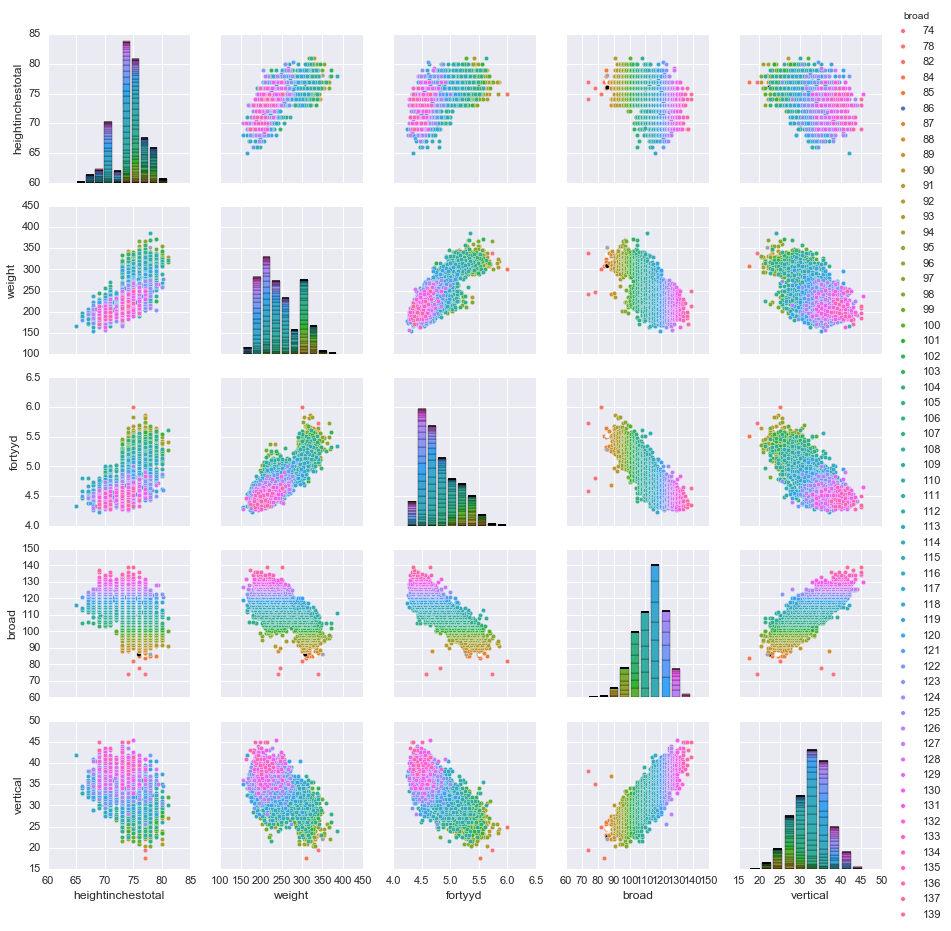

In [4]:
filtered_df = master_dataframe.loc[(master_dataframe["fortyyd"] > 0) & (master_dataframe["broad"] > 0)
                                   & (master_dataframe["twentyss"] > 0) & (master_dataframe["vertical"] > 0)]
                                      
# increase font size by 10%
sns.set(font_scale=1.1)
sns.pairplot(filtered_df, hue = "broad", vars = ["heightinchestotal", "weight", "fortyyd", "broad", "vertical"])

In [5]:
# between-features correlation matrix
print("Correlation Matrix: ")
filtered_df[["heightinchestotal", "weight", "fortyyd", "broad", "vertical"]].corr()

Correlation Matrix: 


,heightinchestotal,weight,fortyyd,broad,vertical
heightinchestotal,1.000000,0.710933,0.604715,-0.446975,-0.435743
weight,0.710933,1.000000,0.862539,-0.717353,-0.648022
fortyyd,0.604715,0.862539,1.000000,-0.825741,-0.757427
broad,-0.446975,-0.717353,-0.825741,1.000000,0.815497
vertical,-0.435743,-0.648022,-0.757427,0.815497,1.000000


- visualize some features in support of initially focusing on the OL
- choose vertical over broad because it has a smaller correlation with the 40-yard dash.
- creat a drafted feature
- then make case to narrow down to just OL, eveything refers OL from then on
- then discuss feature engineering (surface area, force, etc.)
- begin ML and scikit-learn, applying Logistic Regression and SVM on the data
- create confusion matrix
- check ROC/AUC (see Data School blog posts)
- review the Art of Data Science (?)

The pairplot above shows the relationships among the selected features. There's the expected high correlation between height and weight (.71), and there's also a significant correlation between the vertical and broad jumps (.73). Further, the 40-yard dash has a high positive correlation with weight (.86) and a high negative correlation with the broad jump (-.83). We will need to deal with this colinearity in order to maximize the success of our predictive model.

With weight and height being so highly correlated I wanted to combine the two features in some way. Moreover, because different athletes can weigh the same yet have a very different body composition I wanted to come up with some measure of "fatness". With this in mind, I decided to combine height and weight by calculating body mass index ("bmi") as a new feature. This constituted converting wieight from pounds to kilograms ("wt_kg"), and converting height in inches to meters ("ht_m"). I then divided "wt_kg" by "ht_m" squared to create the new "bmi" column, which combines height and weight in a single feature and also provides some indication of "fatness".  

In [319]:
# create a new "wt_kg" column displaying weight in kgs
master_dataframe["wt_kg"] = master_dataframe["weight"] * .453592

# create a new "ht_m" column displaying height in meters
master_dataframe["ht_m"] = master_dataframe["heightinchestotal"] * .0254

# create bmi to account for body composition or fatness relative to weight
master_dataframe["bmi"] = master_dataframe["wt_kg"]/(master_dataframe["ht_m"]**2)


# position groups
CB = ["CB"]
S = ["FS", "SS"]
DB = CB + S
DL = ["DL", "DE", "NT"]
OLB = ["OLB"]
ILB = ["ILB"]
LB = OLB + ILB 
OL = ["C", "OC", "OG", "OT"]
RB = ["RB", "FB"]
WR = ["WR"]
QB = ["QB"]
TE = ["TE"]
K = ["K", "P"]
LINE = DL + OL


### Position Groups

Next, I segregated the position groups in various ways as follows:

CB = ["CB"]
S = ["FS", "SS"]
DB = CB + S
DL = ["DL", "DE", "NT"]
OLB = ["OLB"]
ILB = ["ILB"]
LB = OLB + ILB 
OL = ["C", "OC", "OG", "OT"]
RB = ["RB", "FB"]
WR = ["WR"]
QB = ["QB"]
TE = ["TE"]
K = ["K", "P"]
LINE = DL + OL

(Note that running backs (RB) group includes both RB and FB positions; offensive line (OL) includes all positions along the line as does the defensive line (DL); LINE encompasses both of the OL and DL groups.)

These are the groupings that I will use throughout this project.

Now, before we continue, let's create a "drafted" column.  If a player was drafted the raw data lists the round or pick.  We will use this information to create a binary feature which indicates whether a given player was drafted or not.   

In [321]:
# create a new "drafted" column with a 1 or 0 indicating whether the athlete was drafted or not, repectively
master_dataframe['drafted'] = ((master_dataframe['picktotal'] > 0) & (master_dataframe['picktotal'].notnull()))
master_dataframe["drafted"] = master_dataframe['drafted'].map( {False: 0, True: 1} ).astype(int)

Let's now take the various position groups and compare what proportion of each group gets drafted verses not drafted.

,Drafted,Not Drafted,% Not Drafted
RB,295,226,43.378
QB,169,120,41.522
TE,170,102,37.500
OL,522,299,36.419
ILB,135,77,36.321
S,246,127,34.048
WR,397,190,32.368
DL,285,111,28.030
OLB,246,91,27.003
CB,342,116,25.328


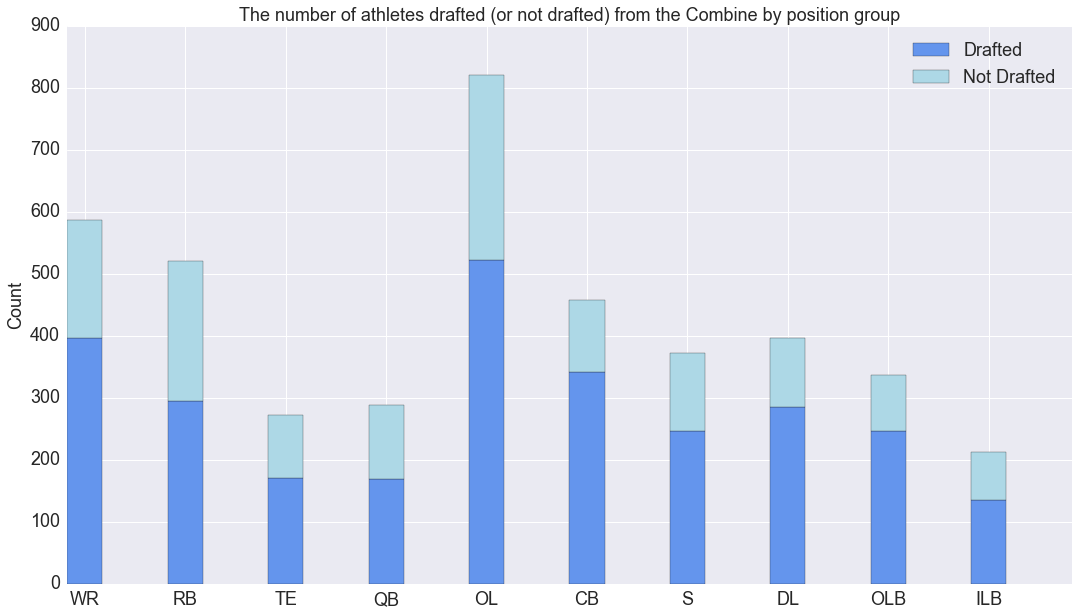

In [247]:

position_groups = [WR, RB, TE, QB, OL, CB, S, DL, OLB, ILB]
position_as_a_str = ['WR', 'RB', 'TE', 'QB', 'OL', 'CB', 'S', 'DL', 'OLB', 'ILB']
N = len(position_groups)

drafted = []
not_drafted = []

for position in position_groups:
    drafted.append(master_dataframe.loc[(master_dataframe["year"] != 2015) & (master_dataframe["position"].isin(position)) & (master_dataframe["drafted"] == 1)]["drafted"].size)
for position in position_groups:
    not_drafted.append(master_dataframe.loc[(master_dataframe["year"] != 2015) & (master_dataframe["position"].isin(position)) & (master_dataframe["drafted"] == 0)]["drafted"].size)

# get the percentage of players who go undrafted
percent_not_drafted = []
for not_drftd, drftd in zip(not_drafted, drafted):
    percent_not_drafted.append(float(not_drftd)/(drftd+not_drftd))
    
average_not_drafted = float(sum(not_drafted))/ (sum(drafted) + sum(not_drafted))
    
fig, ax = plt.subplots(figsize=(18, 10))

index = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = ax.bar(index, drafted, width, color='cornflowerblue')
p2 = ax.bar(index, not_drafted, width, color='lightblue', bottom=drafted)

ax.set_ylabel('Count', fontsize=18)
ax.set_title('The number of athletes drafted (or not drafted) from the Combine by position group', fontsize=18)
plt.xticks(index + width/2., position_as_a_str)
set_tick_labels(ax)
plt.legend((p1[0], p2[0]), ('Drafted', 'Not Drafted'), fontsize=18)


def pretty_percentage(items):
    return map(lambda v: (round(v * 100, 3)), items)

df = pd.DataFrame({'Drafted': drafted , 'Not Drafted': not_drafted, '% Not Drafted': pretty_percentage(percent_not_drafted)}, index=['WR', 'RB', 'TE', 'QB', 'OL', 'CB', 'S', 'DL', 'OLB', 'ILB'])

df.loc[:, ["Drafted", 'Not Drafted', '% Not Drafted']].sort_values(by='% Not Drafted', ascending=False)



The above chart shows the split, by position group, between the proportion of players that are drafted versus not. The numbers reflect the league's emphasis on defense and the passing game. Five of the top six drafted percentages are for defensive positions with cornerback (CB) garnering the highest draft percentage at 75%. The top offensive group is the reciever (WR) group in fourth place with a 68% drafted percentage. Further, the numbers reflect the declining value of the runnng back (RB) in the NFL with a shocking 57% drafted percentage. In other words, 43.37% of all running backs who've attended the Scouting Combine have gone undrafted.

### Key Drills

Next, let's more closely look at what many consider to be the main event at the Combines - the forty-yard dash.

![40-yard Dash](images/GettyImages-40-yd.jpg)

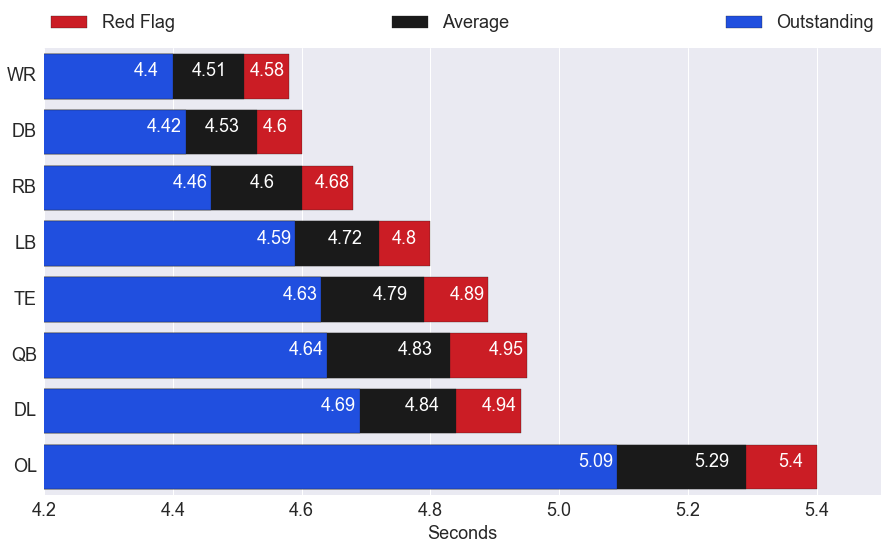

In [41]:
from drill_plots import make_drill_barplot, set_tick_labels    
make_drill_barplot(master_dataframe.loc[master_dataframe["fortyyd"] >= 1,], 'fortyyd')

In the above barplot, you can see the range of performances by position. The blue area indicates that a performance in this range is outstanding, falling at or better than the 85th percentile of all performances since 1999. The black area is the expected (average) range, and performances exceeding this range are "red flags", falling at or below the 25th percentile.

Note the differences in expected performance and the range of expected performance by position.

Next, let's compare 40-yard dash performance to who gets drafted. Let's look at the top 10& and bottom 10% of 40-yard dash performances to see the relationship of speed with draft outcome.

In [45]:
from drill_percentiles import get_position_by_drill_lt_percentile_and_drafted, get_position_by_drill_gt_percentile_and_drafted 

print("Proportion of players drafted by position within the 90th percentile (top 10%) of 40-yard dash performances: ")                       
percent_drafted_at_90th_percentile = get_position_by_drill_lt_percentile_and_drafted(master_dataframe, 'fortyyd', .1)

print("\nProportion of players drafted by position within the 10th percentile (bottom 10%) of 40-yard dash performances: ") 
percent_drafted_at_10th_percentile = get_position_by_drill_gt_percentile_and_drafted(master_dataframe, 'fortyyd', .9)

Proportion of players drafted by position within the 90th percentile (top 10%) of 40-yard dash performances: 
43 / 48 CB
35 / 40 S
79 / 87 DB
41 / 46 DL
32 / 37 OLB
20 / 21 ILB
51 / 56 LB
65 / 86 OL
41 / 54 RB
59 / 63 WR
23 / 29 QB
23 / 27 TE
102 / 121 LINE

Proportion of players drafted by position within the 10th percentile (bottom 10%) of 40-yard dash performances: 
18 / 50 CB
11 / 38 S
28 / 87 DB
22 / 43 DL
14 / 33 OLB
5 / 23 ILB
20 / 59 LB
30 / 86 OL
23 / 55 RB
23 / 60 WR
14 / 30 QB
9 / 30 TE
45 / 119 LINE


![40-yard Dash](images/joeybosa_40.jpg)

One observation that stands out here is that relative speed clearly plays a different role for different positions: 21 out of 86 (24.4%) offensive linemen (OL)in the 90th percentile of the 40-yard dash weren't drafted (the largest percentage of any group), whereas only 4 out of 63 (6.3%) wide receivers (WR) in the 90th percentile weren't drafted. Moreover, over half (51.16%) of the defensive linemen (DL) in the bottom 10% were still drafted. 

Following is an ordered look at the percentage of athletes within a given position group that were drafted, having 40-yard dash performances falling in the top or bottom 10% of their group:

90th percentile:
[('ILB', 95.238), ('WR', 93.651), ('LB', 91.071), ('DB', 90.805), ('CB', 89.583), ('DL', 89.13), ('S', 87.5), ('OLB', 86.486), ('TE', 85.185), ('LINE', 84.298), ('QB', 79.31), ('RB', 75.926), ('OL', 75.581)]

10th percentile:
[('DL', 51.163), ('QB', 46.667), ('OLB', 42.424), ('RB', 41.818), ('WR', 38.333), ('LINE', 37.815), ('CB', 36.0), ('OL', 34.884), ('LB', 33.898), ('DB', 32.184), ('TE', 30.0), ('S', 28.947), ('ILB', 21.739)]
Drop in percentage points:
(ILB,  


Let's compare the drop off among position groups between the percent that are drafted possessing top 40-yard dash performances and those with bottom percentile performances.

In [50]:
print("Difference between % drafted in the top percentile versus the bottom percentile of 40-yard dash performance: \n")
top_10_percentile = [('ILB', 95.238), ('WR', 93.651), ('LB', 91.071), ('DB', 90.805), ('CB', 89.583), ('DL', 89.13), ('S', 87.5), ('OLB', 86.486), ('TE', 85.185), ('LINE', 84.298), ('QB', 79.31), ('RB', 75.926), ('OL', 75.581)]
bottom_10_percentile = [('DL', 51.163), ('QB', 46.667), ('OLB', 42.424), ('RB', 41.818), ('WR', 38.333), ('LINE', 37.815), ('CB', 36.0), ('OL', 34.884), ('LB', 33.898), ('DB', 32.184), ('TE', 30.0), ('S', 28.947), ('ILB', 21.739)]
percent_drop = []
for i in top_10_percentile:
    for j in bottom_10_percentile:
        if i[0] == j[0]:
            percent_drop.append((i[0], (i[1] - j[1])))
print percent_drop 

Difference between % drafted in the top percentile versus the bottom percentile of 40-yard dash performance: 

[('ILB', 73.499), ('WR', 55.318), ('LB', 57.172999999999995), ('DB', 58.62100000000001), ('CB', 53.583), ('DL', 37.967), ('S', 58.553), ('OLB', 44.062000000000005), ('TE', 55.185), ('LINE', 46.483000000000004), ('QB', 32.643), ('RB', 34.108000000000004), ('OL', 40.697)]


Most of these guys are plenty fast but when evaluating draft prospects the speed metric is emphasized more or less by position. For example, 75.92% of RB in the 90th percentile were drafted. However, a surprising 41.81% of running backs in the bottom 10% (or 10th percentile) of 40-yard dash performances were still chosen on draft day.  That's only a drop of 34 percentage points between the top 10% of performances versus the bottom 10% in terms of what percentage was drafted. This was the smallest drop within a positon group other than quarterbacks (79.31%/46.67%), who only dropped 32.6 percentage points between the top and bottom groups within their position on the speed task. Clearly, there are many factors that take priority over speed in terms of selecting an NFL quarterback, but in evaluating an NFL running back, speed also appears to be less of a determining factor in the eyes of scouts, coaches, and general managers.  In contrast, inside linebackers (ILB) have a stunning drop of 73.5 percentage points (95.23/21.73) between the top and the bottom 10% of within-group 40-yard dash performances in terms of being drafted. 

Although everyone looks forward to watching the 40-yard dash - it's the premier event at the Scouting Combine - in terms of being drafted, it certainly isn't a clear indicator for linemen, quarterbacks, nor running backs. Speed matters, but not as much as we like to think. 

Below is a density plot of the 40-yard dash for groups of offensive players and defensive players, providing a visualization of the varied distributions. Note how the defensive position groups are much more tighly distributed, between and withing groups, compared to the offensive position groups.

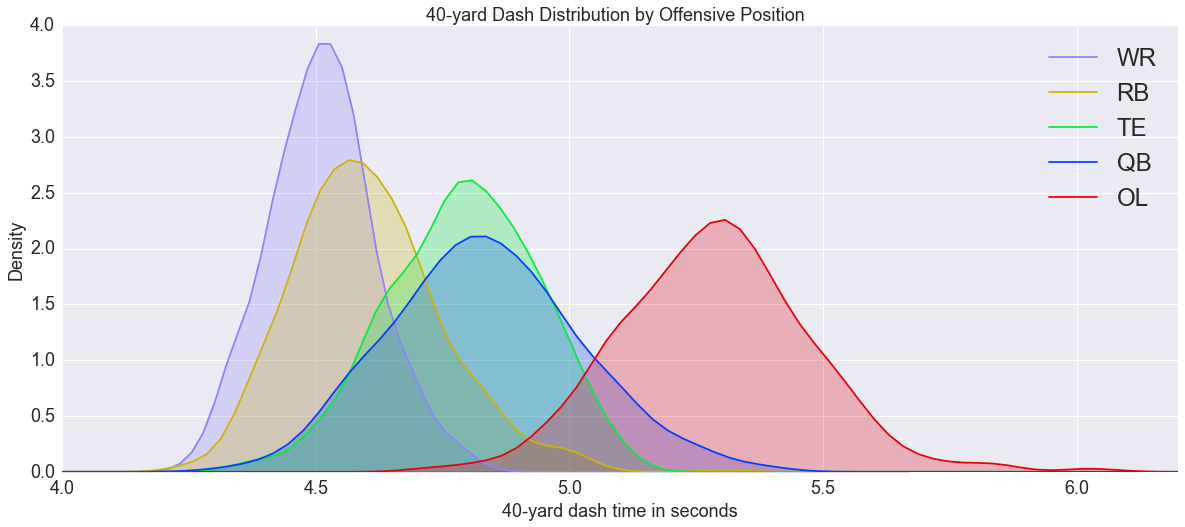

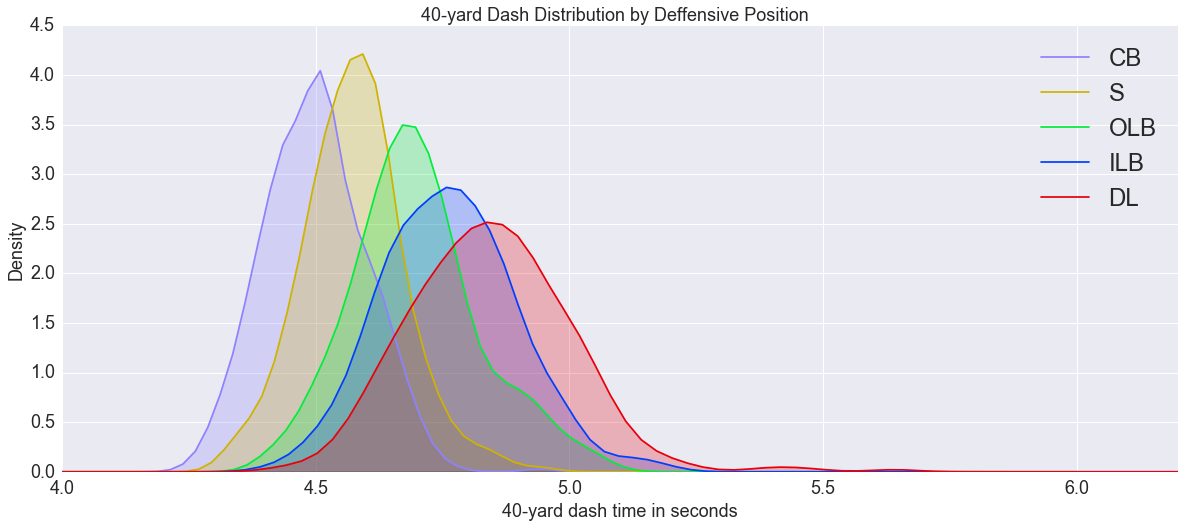

In [77]:
OL_40 = master_dataframe.loc[(master_dataframe["position"].isin(OL)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
QB_40 = master_dataframe.loc[(master_dataframe["position"].isin(QB)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
TE_40 = master_dataframe.loc[(master_dataframe["position"].isin(TE)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
RB_40 = master_dataframe.loc[(master_dataframe["position"].isin(RB)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
WR_40 = master_dataframe.loc[(master_dataframe["position"].isin(WR)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]

fig, ax = plt.subplots(figsize=(20,8))

ax = sns.kdeplot(WR_40, shade=True, color=sns.xkcd_rgb["periwinkle"], label="WR")
ax = sns.kdeplot(RB_40, shade=True, color=sns.xkcd_rgb["mustard"], label="RB")
ax = sns.kdeplot(TE_40, shade=True, color="g", label="TE")
ax = sns.kdeplot(QB_40, shade=True, color="b", label="QB")
ax = sns.kdeplot(OL_40, shade=True, color="r", label="OL")

ax.set_title('40-yard Dash Distribution by Offensive Position  ', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('40-yard dash time in seconds', fontsize = 18)
ax.set_xlim((4.0, 6.2))
plt.legend(fontsize=24)
set_tick_labels(ax)


DL_40 = master_dataframe.loc[(master_dataframe["position"].isin(DL)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
ILB_40 = master_dataframe.loc[(master_dataframe["position"].isin(ILB)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
OLB_40 = master_dataframe.loc[(master_dataframe["position"].isin(OLB)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
S_40 = master_dataframe.loc[(master_dataframe["position"].isin(S)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
CB_40 = master_dataframe.loc[(master_dataframe["position"].isin(CB)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]

fig, ax2 = plt.subplots(figsize=(20,8))

ax2 = sns.kdeplot(CB_40, shade=True, color=sns.xkcd_rgb["periwinkle"], label="CB")
ax2 = sns.kdeplot(S_40, shade=True, color=sns.xkcd_rgb["mustard"], label="S")
ax2 = sns.kdeplot(OLB_40, shade=True, color="g", label="OLB")
ax2 = sns.kdeplot(ILB_40, shade=True, color="b", label="ILB")
ax2 = sns.kdeplot(DL_40, shade=True, color="r", label="DL")

ax2.set_title('40-yard Dash Distribution by Deffensive Position  ', fontsize = 18)
ax2.set_ylabel('Density', fontsize = 18)
ax2.set_xlabel('40-yard dash time in seconds', fontsize = 18)
ax2.set_xlim((4.0, 6.2))
plt.legend(fontsize=24)
set_tick_labels(ax2)

We've seen that there are distict differences among groups regarding speed performances and speed requirements in terms of being drafted. Let's now turn our attention to body type, specifically the "bmi" fetaure that we created earlier. This combined measure should give us a relative indicator of fatness so that absolute weight and height aren't the only body measurements considered. 

![40-yard Dash](images/danny-shelton-combine.jpg)

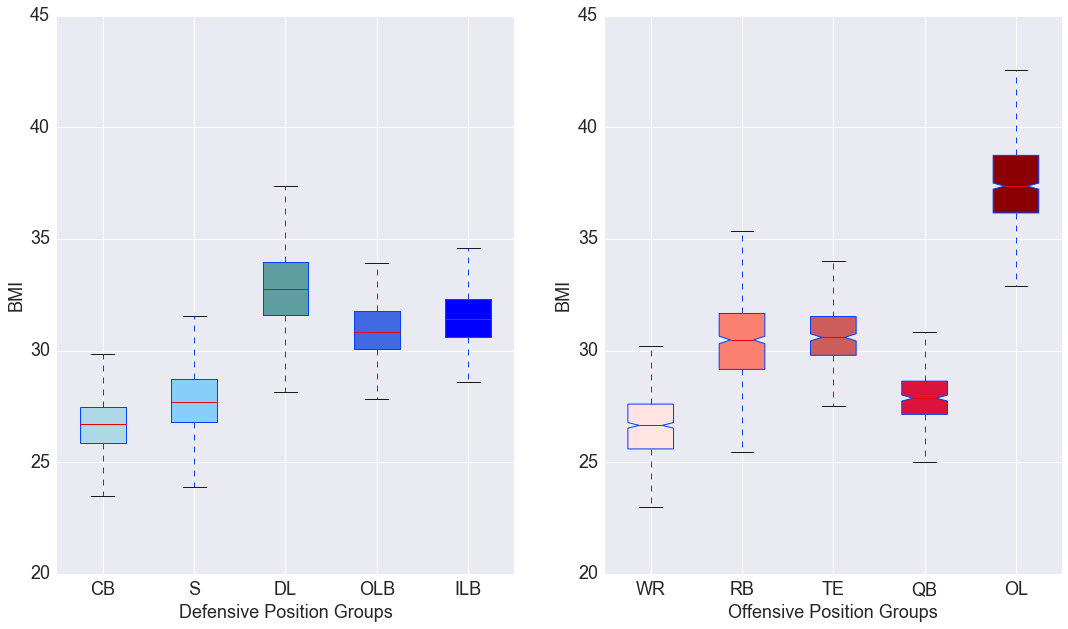

In [84]:
# CB, S, DL, OLB, ILB
corner_backs = master_dataframe.loc[(master_dataframe['position'].isin(CB))]["bmi"]
safeties = master_dataframe.loc[(master_dataframe['position'].isin(S))]["bmi"]
d_linemen = master_dataframe.loc[(master_dataframe['position'].isin(DL))]["bmi"]
out_linebackers = master_dataframe.loc[(master_dataframe['position'].isin(OLB))]["bmi"]
in_linebackers = master_dataframe.loc[(master_dataframe['position'].isin(ILB))]["bmi"]

# WR, RB, TE, QB, OL
receivers = master_dataframe.loc[(master_dataframe['position'].isin(WR))]["bmi"]
running_backs = master_dataframe.loc[(master_dataframe['position'].isin(RB))]["bmi"]
tight_ends = master_dataframe.loc[(master_dataframe['position'].isin(TE))]["bmi"]
quarterbacks = master_dataframe.loc[(master_dataframe['position'].isin(QB))]["bmi"]
o_linemen = master_dataframe.loc[(master_dataframe['position'].isin(OL))]["bmi"]

defensive_groups = np.array([corner_backs, safeties, d_linemen, out_linebackers, in_linebackers])
offensive_groups =  np.array([receivers, running_backs, tight_ends, quarterbacks, o_linemen])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
# rectangular box plot
bplot_d = axes[0].boxplot(defensive_groups, vert=True, patch_artist=True)   # fill with color
bplot_o = axes[1].boxplot(offensive_groups, notch=True, patch_artist=True)   # fill with color

# fill with colors - Defense
colors_d = ['lightblue', 'lightskyblue', "cadetblue", "royalblue", 'blue']
for patch, color in zip(bplot_d['boxes'], colors_d):
    patch.set_facecolor(color)
# fill with colors - Offense
colors_o = ['mistyrose', "salmon", "indianred", "crimson", 'darkred']
for patch, color in zip(bplot_o['boxes'], colors_o):
    patch.set_facecolor(color)
        
# adding axes labels
axes[0].yaxis.grid(True)
axes[0].set_xticks([y+1 for y in range(len(defensive_groups))])
axes[0].set_xlabel('Defensive Position Groups', fontsize=18)
axes[0].set_ylabel('BMI', fontsize=18)

axes[1].yaxis.grid(True)
axes[1].set_xticks([y+1 for y in range(len(offensive_groups))])
axes[1].set_xlabel('Offensive Position Groups', fontsize=18)
axes[1].set_ylabel('BMI', fontsize=18)
        
set_tick_labels(axes[0])
set_tick_labels(axes[1])

# add x-tick labels
plt.setp(axes[0], xticks=[y+1 for y in range(len(defensive_groups))],xticklabels=['CB', 'S', 'DL', 'OLB', 'ILB'])
plt.setp(axes[1], xticks=[y+1 for y in range(len(defensive_groups))],xticklabels=['WR', 'RB', 'TE', 'QB', 'OL'])




Note: The national BMI standards should not be applied to this population as BMI calculations are typically inaccurate for very muscular people (e.g., nearly every athlete in this dataset surpassed a BMI of 25 which is considered overweight).

From the chart above it can be seen that cornerbacks (CB) and receivers (WR) have similar bodies, safeties (S) and quarterbacks (QB) are similarly built, and both linebacker (ILB, OLB) groups are similar to the running back (RB) group. However, it's clear that the offensive linemen's bodies are distinctly different from any other group, including the defensive linemen.

![NFL Scouting Combine - Lineman](images/nfl-combine-football.jpg)

It's clear that the LINE position groups (OL, DL) are very different from the other groups in terms of performance qualities and physique. Because of this, I will initially focus just on the LINE group in terms of predicting who will get drafted. By looking at certain groups separate from the others so that their discriminative features can more readily be learned, a predictive model will probably be more accurate. 

I will apply Logistic Regression to this group, initially using the following features: "height", "weight", "bmi", "twentyss", "fortyyd", "broad", "vertical"


## Prediction

In [263]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score 

# 2015 was dropped as presently they don't have "drafted" results
df_linemen = master_dataframe.loc[(master_dataframe['year'] != 2015) & (master_dataframe["position"].isin(['OC', 'OG', 'OT', 'DE', 'DT', 'NT']))]
df_linemen = df_linemen.loc[(df_linemen["heightinchestotal"] >= 1) & (df_linemen["weight"] >= 1) & (df_linemen["broad"] >= 1) & (df_linemen["fortyyd"] >= 1) & (df_linemen["vertical"] >= 1) & (df_linemen["bench"] >= 1) & (df_linemen["twentyss"] >=1)]

N = df_linemen["fortyyd"].size

X = df_linemen[["heightinchestotal", "weight", "bmi", "twentyss", "fortyyd", "bench", "broad", "vertical"]].values

y = df_linemen["drafted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C = 100.0, random_state = 0)  # linear model # penalty='l1', tol=0.01
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)


print ("LOGISTIC REGRESSION")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

print("training set score: %f" % lr.score(X_train_std, y_train))
print("test set score: %f" % lr.score(X_test_std, y_test))



svm = SVC(kernel = 'linear', C = 100.0, random_state = 0)  # linear model  (has many parameters that need to be tuned)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)

print ("\nSUPPORT VECTOR MACHINE")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

print("training set score: %f" % svm.score(X_train_std, y_train))
print("test set score: %f" % svm.score(X_test_std, y_test))

#cm = metrics.confusion_matrix(y_test, y_pred, labels = [0,1,2])
#sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])



LOGISTIC REGRESSION
Misclassified 88 out of 984
Accuracy: 0.70
training set score: 0.723837
test set score: 0.702703

SUPPORT VECTOR MACHINE
Misclassified 94 out of 984
Accuracy: 0.68
training set score: 0.731105
test set score: 0.682432


The specific features that I chose for the models were because they address body size, speed, strength and explosiveness, key qualities for any lineman. However, the accuracy of both the Linear Regression and SVM models is only moderate. Linear Regression achieved 72% prediction accuracy on the training set and 70% accuracy on the tests set.  Similarly, SVM scored 73% accuracy on the training set and 68% accuracy on the test set. Typically, the unseen test set should be a little less accurate than the training set as is the case here.

I looked at different combinations of the various features but achieved little improvement. I then decided to simplify the model by dropping the "heightinchestotal" and "weight" features and just using the combined "bmi" feature. Further, I decided to drop features that had relatively high null values in order to increase the number of samples in the dataset. This was because the selected number of samples in the LINE dataset was the intersection among the various chosen features that had non-null values. For example, by dropping the features "twentyss" and "vertical", the number of valid samples for the LINE increased from 984 to 1273. This was due to there being so many missing values for those two drills, which required dropping several rows from the dataset (I choose not to apply any imputation of missing values at this point). So, depending on which features were chosen, the number of samples used in training/testing would change.  

In [153]:
df_linemen = master_dataframe.loc[(master_dataframe['year'] != 2015) & (master_dataframe["position"].isin(['OC', 'OG', 'OT', 'DE', 'DT', 'NT']))]
df_linemen = df_linemen.loc[(df_linemen["fortyyd"] >= 1) & (df_linemen["broad"] >= 1)]

N = df_linemen["fortyyd"].size

X = df_linemen[["bmi", "fortyyd","broad"]].values

y = df_linemen["drafted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C = 1.0, random_state = 0)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)


print ("LOGISTIC REGRESSION")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

print("training set score: %f" % lr.score(X_train_std, y_train))
print("test set score: %f" % lr.score(X_test_std, y_test))



svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)  # linear model
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)

print ("\nSUPPORT VECTOR MACHINE")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

print("training set score: %f" % svm.score(X_train_std, y_train))
print("test set score: %f" % svm.score(X_test_std, y_test))

LOGISTIC REGRESSION
Misclassified 104 out of 1273
Accuracy: 0.73
training set score: 0.680135
test set score: 0.727749

SUPPORT VECTOR MACHINE
Misclassified 115 out of 1273
Accuracy: 0.70
training set score: 0.663300
test set score: 0.698953


Above, you can see that the test-set prediction from the simpler model provided a slight improvement, and additionally there was an increased number of samples in the LINE dataset (an increase from 984 o 1273). Logistic Regression scored an accuracy of 73% on the test data and SVM scored 70% on the test data. However, it appears that we now might be underfitting as, in this instance, the training set score is less than the test score. Although this model is much simpler it perhaps isn't capturing key regularities within the data. To address this I will sythesize some additional features from existing ones in an attempt to decrease the bias in the model and perhaps better capture important patterns within the data.

One feature that I considered might provide a contribution to draftability is the players pedigree, where a prospect played college football, received collegiate coaching and the level of competition that he competed against. Moreover, whether conciously or not, I believe that many scouts and general managers are influenced by brand name. All things being equal, the fact that an athlete played his college ball at a "power" school would perhaps inure to the benefit of that player.  In this light, I sought the U.S. colleges that recruit the best high school talent and that participate in the best coonferences for collegiate football. The Power Five conferences (ACC, Big 12, Big Ten, Pac-12, SEC) are 65 school from 5 different conferences which generally recruit nationally and are regarded as having the best talent and the best college football teams in the country. So I created a binary "power5" feature which reflects whether a prospect played their college ball at a Power Five school. 


In [317]:



# create a list of the Power5 schools for boolean feature
  # ACC, Big 12, Big Ten, Pac-12, SEC
power5 = ["Boston College", "Clemson", "Duke", "Florida St.", "Florida State",
          "Geogia Tech", "Louisville",  "Miami (FL)", "North Carolina", 
          "North Carolina St.", "N.C. State","North Carolina State", "Pittsburgh", 
          "Syracuse", "Virginia", "Virginia Tech", "Wake Forest", "Notre Dame", 
          "Baylor", "Iowa St.", "Iowa State", "Kansas", "Kansas St.", "Kansas State", 
          "Oklahoma", "Oklahoma State", "Oklahoma St.", "TCU", "Texas", "Texas Tech", 
          "West Virginia", "Illinois", "Indiana", "Iowa", "Maryland", "Michigan", 
          "Michigan St.", "Michigan State", "Minnesota", "Nebraska", "Northwestern", 
          "Ohio State", "Ohio St.", "Penn St.", "Penn State", "Purdue", "Rutgers", 
          "Wisconsin", "Arizona", "Arizona St.", "Arizona State", "California", 
          "UCLA", "Colorado", "Oregon", "Oregon St.", "Oregon State", "USC", 
          "Stanford", "Utah", "Washington", "Washington St.", "Washington State", 
          "Alabama", "Arkansas", "Auburn", "Florida", "Georgia", "Kentucky", "LSU", 
          "Mississippi", "Mississipi St.", "Mississippi State", "Missouri", 
          "South Carolina", "Tennessee", "Texas A&M", "Vanderbilt"]

# create boolean feature to show whether player comes from a Power 5 conference    
master_dataframe["power5"] = master_dataframe["college"].isin(power5).astype(int)  
#master_dataframe["power5"] = master_dataframe.loc[(master_dataframe["college"].notnull()), "college"].isin(power5).astype(int)


Next, because of the varied size of linemen in particular, a common measure that teams consider is size to speed ratio. I first calculated body surface area ("b_s_a", as shown below). I then divided "fortyyd" by "b_s_a" to create the new feature "size_speed" as a measure of size-speed ratio.

Similarly, I also created a relative measure for the jumps ("broad", "vertical") to consider a size to distance ratio. Here, I divided the sum of the jumps ("broad" + "vertical") for a given athlete by his body surface area ("b_s_a").

In [202]:

# body weight to distance ratio to encapsulate generated force (power)
master_dataframe["force"] = master_dataframe["wt_kg"] * (master_dataframe["vertical"] + master_dataframe["broad"])

# create weight to speed ratio
master_dataframe["rel_speed"] = master_dataframe["wt_kg"] / (master_dataframe["fortyyd"])

# calculate body surface area to use as a size measure
master_dataframe["b_s_a"] = np.sqrt( ( (master_dataframe["ht_m"] * 100 ) * master_dataframe["wt_kg"] ) / 3600 )

# create size/speed ratio to encapsulate relative speed
master_dataframe["size_speed"] = master_dataframe["fortyyd"] / master_dataframe["b_s_a"] 

# create size/distance ratio to encapsulate power
master_dataframe["size_distance"] = (master_dataframe["vertical"] + master_dataframe["broad"]) / master_dataframe["b_s_a"]


Since "broad" and "vertical" are so highly correlated (.815) I decided to drop one, and since "vertical" has a smaller correlation with "fortyyd" I chose to keep "vertical" (see Correlation Matrix). So, after evaluating the various combinations of features and applying some regularization, the best combination, up to this point,turns out to be ["bmi", "fortyyd", "vertical",  "size_speed", "power5"]. 

![NFL Scouting Combine - Lineman](images/combine_vert.jpg)



847 were drafted out of 1258
659 are in  power5 out of 1258
LOGISTIC REGRESSION
Misclassified 52 out of 1258
Accuracy: 0.86
training set score: 0.834091
test set score: 0.862434

SUPPORT VECTOR MACHINE
Misclassified 57 out of 1258
Accuracy: 0.85
training set score: 0.823864
test set score: 0.849206
[[ 0.24437857 -0.38292046  0.26986873  2.12458333]]
F1 score: 0.876356


/Users/antonyr/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:56: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


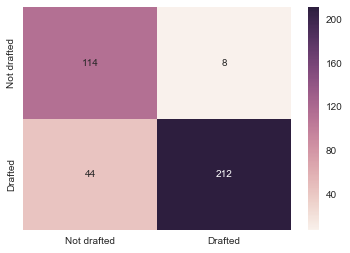

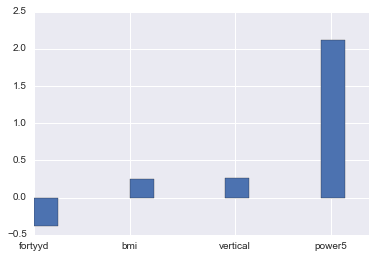

In [331]:
df_linemen = master_dataframe.loc[(master_dataframe['year'] != 2015) & (master_dataframe["position"].isin(['OC', 'OG', 'OT', 'DE', 'DT', 'NT']))]
df_linemen = df_linemen.loc[(df_linemen["fortyyd"] >= 1) & (df_linemen["vertical"] >= 1) & (df_linemen["broad"] >= 1) & (df_linemen["power5"].notnull())]

N = df_linemen["fortyyd"].size

X = df_linemen[["bmi", "fortyyd","vertical", "power5"]].values

y = df_linemen["drafted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print df_linemen.loc[df_linemen["drafted"]== 1, "drafted"].size, "were drafted out of {}".format(N)
print df_linemen.loc[df_linemen["power5"] == 1, "power5"].size, "are in  power5 out of {}".format(N)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C = 1.0, random_state = 0, penalty='l2', tol=0.01)  # linear model # , 
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)


print ("LOGISTIC REGRESSION")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

print("training set score: %f" % lr.score(X_train_std, y_train))
print("test set score: %f" % lr.score(X_test_std, y_test))

# CONFUSION MATRIX
plt.ylabel("Real value")
plt.xlabel("Predicted value")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not drafted', 'Drafted'], yticklabels=['Not drafted', 'Drafted'])



svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)  # linear model  (has many parameters that need to be tuned)
#svm = SVC(kernel = 'rbf', C = 1.0, random_state = 0, gamma = 5.0)  # becomes non-linear with (kernel trick) Radial Basis Function Kernel
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)

print ("\nSUPPORT VECTOR MACHINE")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

print("training set score: %f" % svm.score(X_train_std, y_train))
print("test set score: %f" % svm.score(X_test_std, y_test))
print lr.coef_

fig, ax = plt.subplots()

coefs = pd.Series(lr.coef_[0], index=df_linemen[["bmi", "fortyyd","vertical", "power5"]].columns)
coefs.sort()

ax.bar([0,2,4,6], sorted(lr.coef_[0]), width=.5)
ax.set_xticklabels(coefs.index)
ax.set_xticks([0,2.2,4.2,6.2])
print "F1 score: %f" % f1_score(y_test, y_pred)

With the addition of the engineered features "size_speed" and "power5", Logistic Regression achieved an improved accuracy of 86% (SVM achieved 85% success). The model misclassified 52 of the 378 linemen in the test set. The above Confusion Matrix shows that of the 122 that were not drafted the model predicted that 8 of them would be drafted, and of the 256 that were drafted the model predicted that 44 would go undrafted.

Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced (that is, when the number of samples in different classes vary greatly)

Although the model performed pretty respectable, the test set still achieves a higher score than the training set so more can be done here.

## Next Steps
Before I evaluate other position groups I believe that it will be extremely useful for me to fill in as many of the missing values for "drafted" and "college" as possible so that more samples can be used without resorting to imputation.

I will also look at utilizing employing polynomial features as more complex models can increase variance (and decrease bias) enabling a more accurate representation of the training dataset.





,Drafted,Not Drafted,% Not Drafted
RB,295,226,43.378
QB,169,120,41.522
TE,170,102,37.500
OL,522,299,36.419
ILB,135,77,36.321
S,246,127,34.048
WR,397,190,32.368
DL,285,111,28.030
OLB,246,91,27.003
CB,342,116,25.328


### Conclusion
The NFL Scouting Combine is sort of a final exam for both the players and the scouts. One last opportunity for both sides to chnage minds or have their minds changed. 

Other than being a major event worth a lot of money to the NFL, I can't say whether the Scouting Combine is directly useful in determining whom a team will select on draft day. So much work has gone into evaluations prior to the Combines that perhaps many teams already have their minds made up and are just looking for confirmation. But it does appear that those who will get drafted the following month can be predicted, to some degree, from their performances exhibited at the Combines. Moreover, it may be that the Combines are most useful in aiding teams to identify the hidden gems, the non-consensus players who may have attended a smaller school, be coming off of an injury, or who've had uneven performances throughout their college career. These are the players who are often selected in the later rounds when it can be a coin-toss as to whom to select. Perhaps minds can more readily be influenced among these groups of players as draft day approaches.


Perhaps this information could be especially useful to underclassmen debating whether to declare for the draft which costs them their remaining college eligibility, even if they go undrafted. Perhaps it can enable them to make more informed decisions. (a record 107 declared and 30 were left undrafted in 2016 (28%) - 36 out of 98 in 2014, 24 out of 84 (74) in 2015). Many notable players go undrafted and many unknown (to the larger public) often end up showing up on draft boards.


